In [43]:
# Alle Variablen löschen ohne zu fragen.
# Hierdurch werden Seiteneffekte vermieden.
%reset -f

In [44]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Vorbereitende Berechnungen

In [45]:
# Bei jedem Duchlauf immer die gleichen Zufallszahlen verwenden.
# Anm: So erhält man vergleichbare Ergebnisse.

np.random.seed(42)

x_stepwidth =  0.15
Size  of x  =  40
Shape of x  =  (40,)
Size  of yNoise =  40
Shape of Noise  =  (40,)


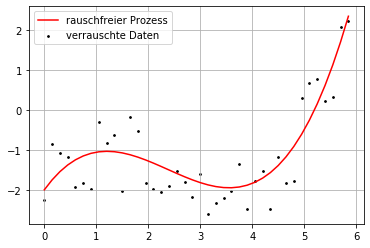

In [46]:
# Erzeugen eines verrauschten Datensatzes (x,yNoise)
# --------------------------------------------------

n      = 40 # Anzahl der Messpunkte
pp     = 2  # Rauschamplitude Peak-to-Peak
xStart = 0  
xStop  = 6

# Schrittweite der Messwerte in x-Richtung
x_stepwidth = (xStop-xStart)/n
print('x_stepwidth = ', x_stepwidth)

# Erzeugen des Zufallszahlen-Vektors für das
# Verrauschen des polynomalen Prozesses
rv    = pp*np.random.rand(n)-pp/2
# Erzeugen des x-Vektors
x     = np.arange(xStart, xStop, x_stepwidth)
print('Size  of x  = ', x.size)
print('Shape of x  = ', x.shape)

# Erzeugen des rauschfreien polynomalen Prozesses yTrue.
yTrue  = 0.14*x**3 -1.0*x**2 +1.8*x - 2
# Verrauschen des Prozesses
yNoise = rv + yTrue
print('Size  of yNoise = ', yNoise.size)
print('Shape of Noise  = ', yNoise.shape)

# Prozess und verrauschten Prozess anzeigen.
plt.scatter(x, yNoise, s=3,  color='black', label='verrauschte Daten')
plt.plot(   x, yTrue, 'red', label='rauschfreier Prozess')
plt.grid()
plt.legend(numpoints=None)

# Teilaufgabe 1:   Ausgleichsgerade y=ax+b berechnen

In [47]:
# Parameter a und b der Ausgleichsgerade yLin=ax+b berechnen
# -------------------------------------------------------
# 1. A-Matrix aufstellen
# 2. shape von Matrix A anzeigen und kontrollieren
# 3. Die Parameter pLin=[a,b] der Gerade durch Ausgleichung 
#   A_T * A * pLin = A_T * y_Noise bestimmen.

# Hier geht es los .........

z = np.ones(x.size)
A_T_lin = np.array([x, z])
A_lin = np.transpose(A_T_lin)
bT_lin = np.array([yNoise])
b_lin = np.transpose(bT_lin)


A_TA_lin = np.dot(A_T_lin, A_lin)
A_Tb_lin = np.dot(A_T_lin, b_lin)

x1_lin = np.linalg.solve(A_TA_lin, A_Tb_lin)


y_lin = x * x1_lin[0] + x1_lin[1]
print(y_lin)

______________________
[-2.03793567 -1.99442583 -1.95091598 -1.90740614 -1.8638963  -1.82038646
 -1.77687661 -1.73336677 -1.68985693 -1.64634709 -1.60283725 -1.5593274
 -1.51581756 -1.47230772 -1.42879788 -1.38528804 -1.34177819 -1.29826835
 -1.25475851 -1.21124867 -1.16773883 -1.12422898 -1.08071914 -1.0372093
 -0.99369946 -0.95018962 -0.90667977 -0.86316993 -0.81966009 -0.77615025
 -0.73264041 -0.68913056 -0.64562072 -0.60211088 -0.55860104 -0.5150912
 -0.47158135 -0.42807151 -0.38456167 -0.34105183]


In [48]:
# 1. Alle Punkte yLin der Ausgleichsgerade yLin=ax+b berechnen
# 2. shape der berechneten Punkte yLin ausgeben und kontrollieren 

# Hier geht es los .........

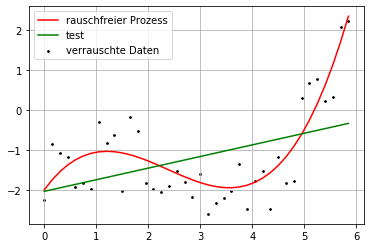

In [49]:
# Ergebnis mit Legende plotten
# a) verrauschte Daten (schwarz), 
# b) rauschfreier Prozess (rot) 
# c) Ausgleichsgerade yLin (grün)

# Hier geht es los .........
# Prozess und verrauschten Prozess anzeigen.
plt.scatter(x, yNoise, s=3,  color='black', label='verrauschte Daten')
plt.plot(   x, yTrue, 'red', label='rauschfreier Prozess')
plt.plot(x, y_lin, 'green', label ='test')
plt.grid()
plt.legend(numpoints=None)

# Teilaufgabe 2:   Ausgleichspolynom 3. Grades berechnen 
(= Kubische Funktion)

In [51]:
# Die Parameter p3, p2, p1, p0 des Ausgleichspolynoms 
# yKub = p3*x**3 + p2*x**2 + p1*x + p0 berechnen
# -------------------------------------------------------
# 1. A-Matrix aufstellen
# 2. shape von Matrix A anzeigen und kontrollieren
# 3. Die Parameter pKub=[p3, p2, p1, p0] der Gerade durch Ausgleichung 
#   A_T * A * pKub = A_T * y_Noise bestimmen.

# Hier geht es los .........

z = np.ones(x.size)
x_2 = x * x
x_3 = x_2 * x
print(x)
print(x_2)
A_T_kub = np.array([x_3, x_2, x, z])
A_kub = np.transpose(A_T_kub)
bT_kub = np.array([yNoise])
b_kub = np.transpose(bT_kub)


A_TA_kub = np.dot(A_T_kub, A_kub)
A_Tb_kub = np.dot(A_T_kub, b_kub)

x1_kub = np.linalg.solve(A_TA_kub, A_Tb_kub)


y_kub = x_3 * x1_kub[0]+ x_2 * x1_kub[1] + x * x1_kub[2] + x1_kub[3]


[0.   0.15 0.3  0.45 0.6  0.75 0.9  1.05 1.2  1.35 1.5  1.65 1.8  1.95
 2.1  2.25 2.4  2.55 2.7  2.85 3.   3.15 3.3  3.45 3.6  3.75 3.9  4.05
 4.2  4.35 4.5  4.65 4.8  4.95 5.1  5.25 5.4  5.55 5.7  5.85]
[0.00000e+00 2.25000e-02 9.00000e-02 2.02500e-01 3.60000e-01 5.62500e-01
 8.10000e-01 1.10250e+00 1.44000e+00 1.82250e+00 2.25000e+00 2.72250e+00
 3.24000e+00 3.80250e+00 4.41000e+00 5.06250e+00 5.76000e+00 6.50250e+00
 7.29000e+00 8.12250e+00 9.00000e+00 9.92250e+00 1.08900e+01 1.19025e+01
 1.29600e+01 1.40625e+01 1.52100e+01 1.64025e+01 1.76400e+01 1.89225e+01
 2.02500e+01 2.16225e+01 2.30400e+01 2.45025e+01 2.60100e+01 2.75625e+01
 2.91600e+01 3.08025e+01 3.24900e+01 3.42225e+01]


In [52]:
# 1. Alle Punkte yKub des Ausgleichspolynoms yKub = p3*x**3 + p2*x**2 + p1*x + p0 berechnen
# 2. shape der berechneten Punkte y ausgeben und kontrollieren 


# Hier geht es los .........

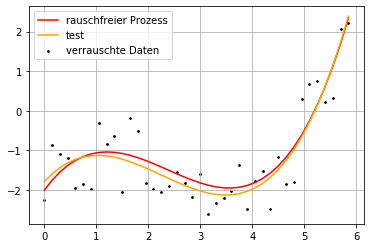

In [53]:
# Ergebnis mit Legende plotten
# a) verrauschte Daten (schwarz), 
# b) rauschfreier Prozess (rot) 
# c) Kub. Ausgleichspolynom (orange)

# Hier geht es los .........
plt.scatter(x, yNoise, s=3,  color='black', label='verrauschte Daten')
plt.plot(   x, yTrue, 'red', label='rauschfreier Prozess')
plt.plot(x, y_kub, 'orange', label ='test')
plt.grid()
plt.legend(numpoints=None)

# Teilaufgabe 3:   Ausgleichspolynom 9. Grades berechnen 

In [55]:
# Parameter p9, p8, p7, .... p2, p1, p0 des Ausgleichspolynoms 
# yPoly = p9*x**9 + p8*x**8 +...... + p3*x**3 + p2*x**2 + p1*x + p0 berechnen
# ----------------------------------------------------------------------
# 1. A-Matrix aufstellen
# 2. shape von Matrix A anzeigen und kontrollieren
# 3. Die Parameter pPoly=[p9, p8, ..... p3, p2, p1, p0] des Polynoms durch Ausgleichung 
#   A_T * A * pPoly = A_T * y_Noise bestimmen.

# Hier geht es los .........
z = np.ones(x.size)
x_2 = x * x
x_3 = x_2 * x
x_4 = x_3 * x
x_5 = x_4 * x
x_6 = x_5 * x
x_7 = x_6 * x
x_8 = x_7 * x
x_9 = x_8 * x

A_T_9 = np.array([x_9, x_8, x_7, x_6, x_5, x_4, x_3, x_2, x, z])
A_9 = np.transpose(A_T_9)
bT_9 = np.array([yNoise])
b_9 = np.transpose(bT_9)


A_TA_9 = np.dot(A_T_9, A_9)
A_Tb_9 = np.dot(A_T_9, b_9)

x1_9 = np.linalg.solve(A_TA_9, A_Tb_9)


y_9 = x_9 * x1_9[0] + x_8 * x1_9[1] + x_7 * x1_9[2] + x_6 * x1_9[3] + x_5 * x1_9[4] + x_4 * x1_9[5] + x_3 * x1_9[6] + x_2 * x1_9[7] + x * x1_9[8] + x1_9[9] 

In [56]:
# Ausgleichspolynom 9-ten Gerades berechnen 
# 1. Alle Punkte yPoly des Ausgleichspolynoms 
#    yPoly = p9*x**3 + .... + p3*x**3 + p2*x**2 + p1*x + p0 berechnen
# 2. shape der berechneten Punkte yPoly ausgeben und kontrollieren 


# Hier geht es los .........

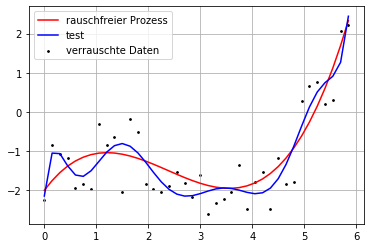

In [57]:
# Ergebnis mit Legende plotten
# a) verrauschte Daten (schwarz), 
# b) rauschfreier Prozess (rot) 
# c) Ausgleichspolynom 9. Grades (blau)

# Hier geht es los .........
plt.scatter(x, yNoise, s=3,  color='black', label='verrauschte Daten')
plt.plot(   x, yTrue, 'red', label='rauschfreier Prozess')
plt.plot(x, y_9, 'blue', label ='test')
plt.grid()
plt.legend(numpoints=None)

In [14]:
# Liste der Variablen ausgeben
%whos 

Variable      Type       Data/Info
----------------------------------
mpl           module     <module 'matplotlib' from<...>matplotlib\\__init__.py'>
n             int        40
np            module     <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
plt           module     <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
pp            int        2
rv            ndarray    40: 40 elems, type `float64`, 320 bytes
x             ndarray    40: 40 elems, type `float64`, 320 bytes
xStart        int        0
xStop         int        6
x_stepwidth   float      0.15
yNoise        ndarray    40: 40 elems, type `float64`, 320 bytes
yTrue         ndarray    40: 40 elems, type `float64`, 320 bytes
